# Copulas Sampling

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import chaospy as cp

from temfpy.uncertainty_quantification import eoq_model

We specify a joint uniform distribution centered around $\mathbf{x^0}=(M, C, S) = (1230, 0.0135, 2.15)$ and spread the support 10% above and below the center. We then make a Nataf copula from the joint distribution, with specifying correlations, then draw $1,000$ random samples from the joint distribution of the input parameters.

In [2]:
dist = list()
for center in [1230, 0.0135, 2.15]:
    lower, upper = 0.9 * center, 1.1 * center
    dist.append(cp.Uniform(lower, upper))

In [3]:
joint_dist = cp.J(*dist)

In [4]:
joint_dist

J(Uniform(lower=1107.0, upper=1353.0), Uniform(lower=0.01215, upper=0.01485), Uniform(lower=1.935, upper=2.365))

In [5]:
corr = [[1, 0.6, 0.2], [0.6, 1, 0], [0.2, 0, 1]]

In [6]:
copula = cp.Nataf(joint_dist, corr)

In [7]:
x = copula.sample(10000, rule="random")

We are now ready to compute the optimal economic order quantity for each draw.

In [8]:
y = eoq_model(x)

This results in the following distribution $f_{Y}$, and correlated marginal distribution between $Y$ and $X$'s.

[]

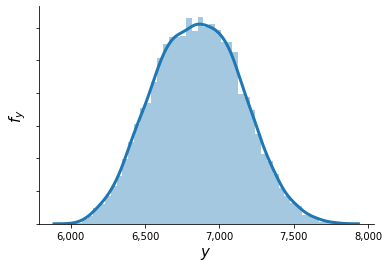

In [9]:
fig, ax = plt.subplots()

sns.distplot(y, ax=ax)

ax.set_xlabel(r"$y$")
ax.set_ylabel(r"$f_y$")

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.axes.get_yaxis().set_ticklabels([])

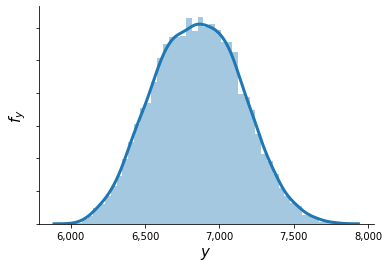

In [10]:
fig

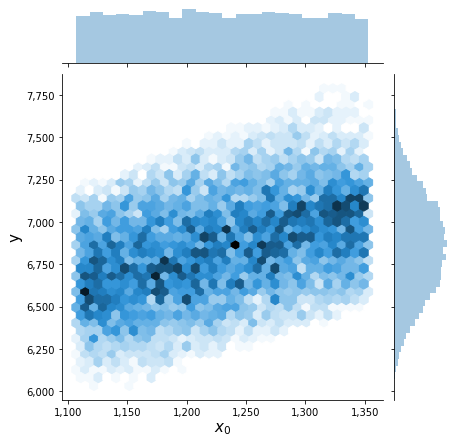

In [11]:
g = sns.jointplot(x=x[0], y=y, kind="hex")
g.set_axis_labels(r"$x_0$", "y")
g.ax_joint.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
g.ax_joint.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

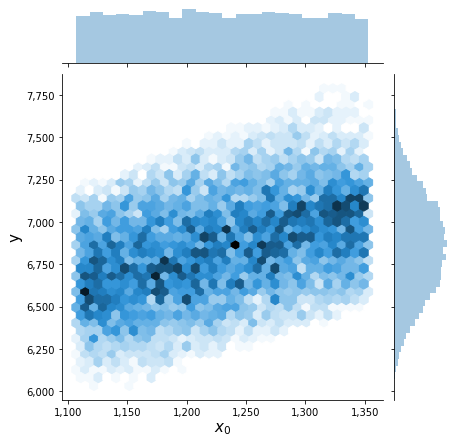

In [12]:
g.fig

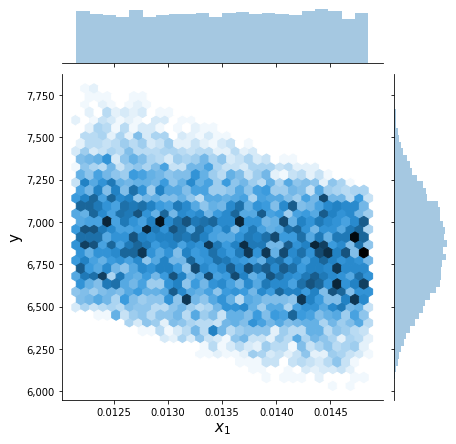

In [13]:
g = sns.jointplot(x=x[1], y=y, kind="hex")
g.set_axis_labels(r"$x_1$", "y")
g.ax_joint.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
g.ax_joint.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.4f}'))

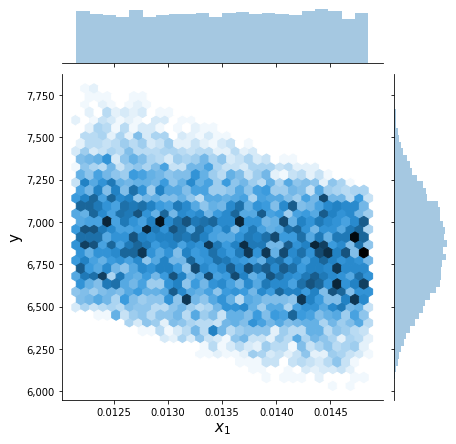

In [14]:
g.fig

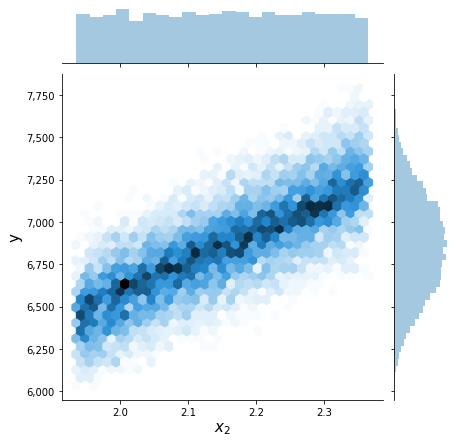

In [15]:
g = sns.jointplot(x=x[2], y=y, kind="hex")
g.set_axis_labels("x", "y")
g.set_axis_labels(r"$x_2$", "y")
g.ax_joint.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
g.ax_joint.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

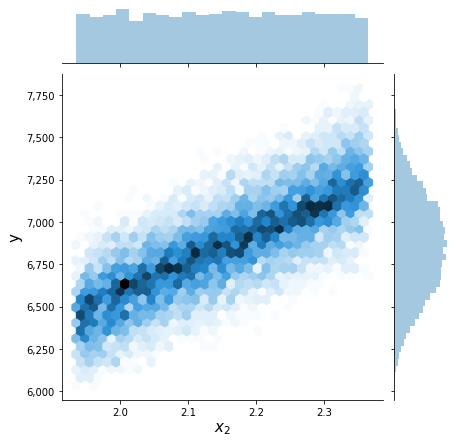

In [16]:
g.fig